In [1]:
import scipy.io as sio
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
FILE =sio.loadmat("/Users/wangyuning/Desktop/Data-driven Methods in Engineering Mechanics/SM2001_Project/Data generator (Moehlis model)/moehlis_data_1000.mat")
DATA  = FILE["data"]
print(FILE.keys())
print(f"The shape of whole dataset is {DATA.shape}")

dict_keys(['__header__', '__version__', '__globals__', 'data'])
The shape of whole dataset is (1000, 4000, 9)


In [3]:
#Number of Timeseries
SERIES_NUM = DATA.shape[0]
# Timesteps
TIME = DATA.shape[1]
# ODE
ODE = DATA.shape[2]

In [275]:
A2 = DATA[:11,:,1]
A1 = DATA[:11,:,0]
A3 = DATA[:11,:,2]
print(f"Shape of all a2 is {A2.shape}")
print(f"Shape of all a1 is {A1.shape}")
print(f"Shape of all a3 is {A3.shape}")
dA2 = A2[:,1:]- A2[:,0:-1]
print(dA2.shape)

Shape of all a2 is (11, 4000)
Shape of all a1 is (11, 4000)
Shape of all a3 is (11, 4000)
(11, 3999)


In [276]:

A1_s = np.ma.masked_where(dA2<0, A1[:,:-1])
A3_s = np.ma.masked_where(dA2<0, A3[:,:-1])
# print(np.unique(indx))
print(A1_s.shape)


(11, 3999)


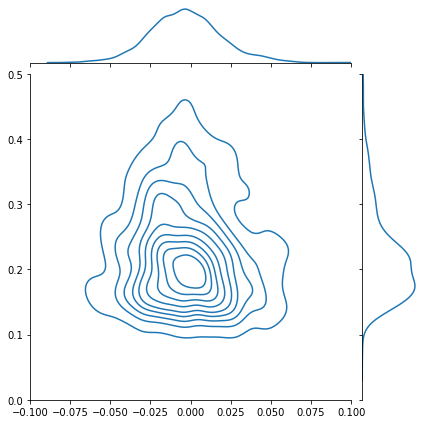

In [305]:
import seaborn as sns
# sns.jointplot(x=A3_s[0,:],y=A1_s[0,:],kind='kde',xlim=[-0.1,0.1],ylim=[0,0.5])
# sns.jointplot(x=A3_s[1,:],y=A1_s[1,:],kind='kde',xlim=[-0.1,0.1],ylim=[0,0.5])
# sns.jointplot(x=A3_s[2,:],y=A1_s[2,:],kind='kde',xlim=[-0.1,0.1],ylim=[0,0.5])
sns.jointplot(x= np.average(A3_s[:,::],0),y=np.average(A1_s[:,::],0),kind='kde',xlim=[-0.1,0.1],ylim=[0,0.5])

plt.show()

## Perturbation

In [313]:
diff = np.sqrt(  (DATA[1,:,:] - DATA[2,:,:])**2  )
diff.shape

(4000, 9)

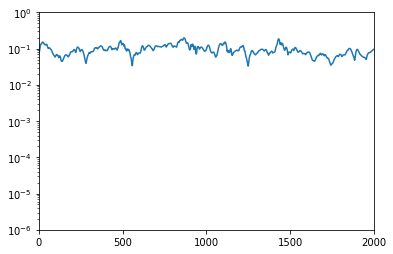

In [314]:
plt.semilogy(np.mean(diff,-1))
plt.ylim([1e-6,1e0])
plt.xlim([0,2000])
plt.xticks([0,500,1000,1500,2000])
plt.show()


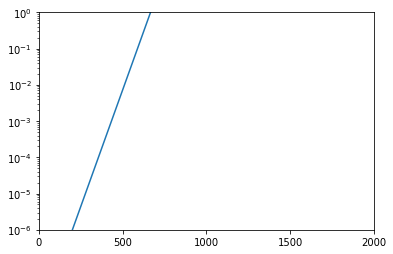

In [332]:

t = np.arange(TIME)
t_p = t -200
pertub = np.exp(0.0296 * t_p) *1e-6

plt.semilogy(pertub[:2000])

plt.ylim([1e-6,1e0])
plt.xlim([0,2000])
plt.xticks([0,500,1000,1500,2000])
plt.show()

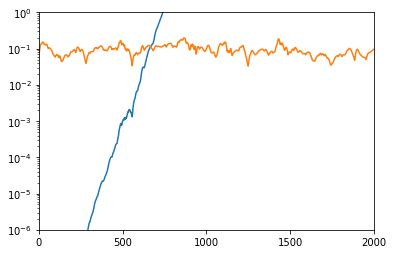

In [333]:
diff_pertube = np.empty(shape=diff.shape)
for i in range(diff.shape[-1]):
    diff_pertube[:,i] = pertub * diff[:,i] 
plt.semilogy(np.mean(diff_pertube,-1))
plt.semilogy(np.mean(diff,-1))
plt.ylim([1e-6,1e0])
plt.xlim([0,2000])
plt.xticks([0,500,1000,1500,2000])
plt.show()

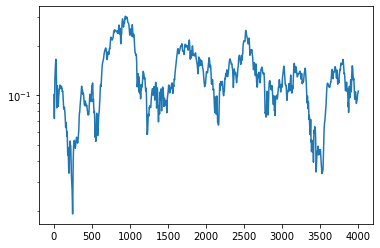

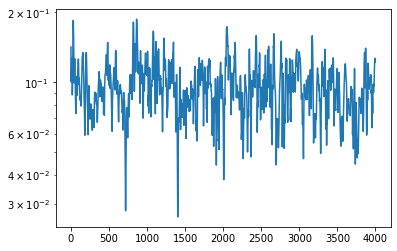

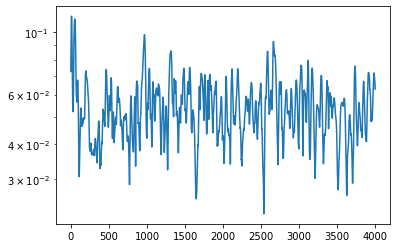

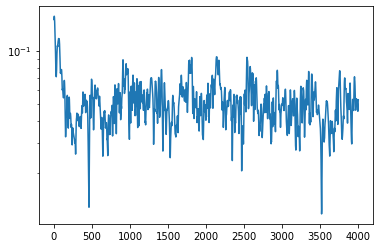

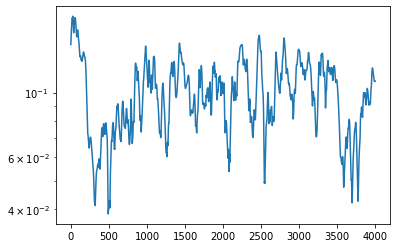

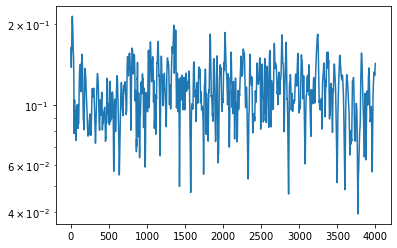

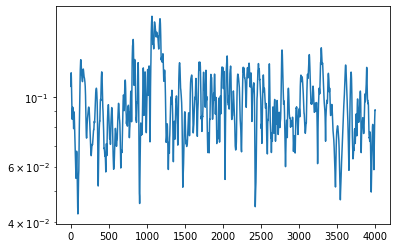

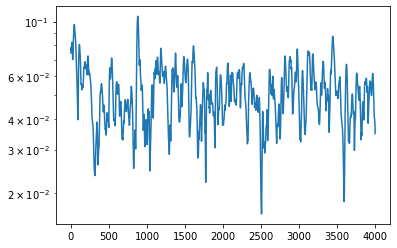

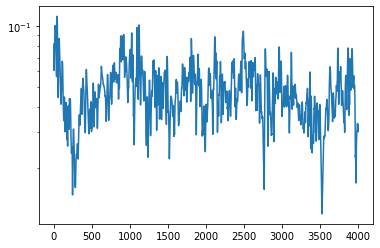

In [363]:
Diff = np.sqrt( (DATA[:10,:,:] - DATA[10:20,:,:])**2 )
for i in range(ODE):
    plt.semilogy(np.mean(Diff[:,:,i],0))
    plt.show()

In [364]:
diff_5000 = np.mean(Diff[:,:,:],(0,-1))

In [365]:
diff_5000[300]

0.05600058099345781

In [366]:
lamd = np.log(diff_5000[250:]/diff_5000[250])
lamd=np.mean(lamd)
lamd

0.371660774610139

/var/folders/h3/1k8qyncd5dn7cx_3ncvl4yh40000gn/T/ipykernel_33694/4237784428.py:3: RuntimeWarning: overflow encountered in exp
  pertub = np.exp(lamd * t_p) *1e-2


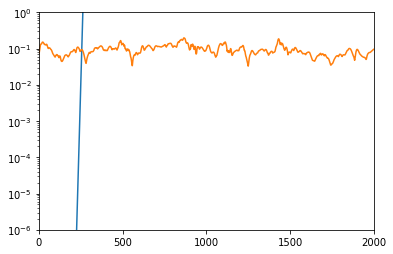

In [367]:
t = np.arange(TIME)
t_p = t -250
pertub = np.exp(lamd * t_p) *1e-2
plt.semilogy(pertub[:2000])
plt.semilogy(np.mean(diff,-1))
plt.ylim([1e-6,1e0])
plt.xlim([0,2000])
plt.xticks([0,500,1000,1500,2000])
plt.show()